In [0]:
# ライブラリのインポート
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
from sklearn import datasets

In [0]:
# ワインデータのダウンロード
wine = datasets.load_wine()
X = wine.data
y = wine.target

# 特徴量と正解ラベルを訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('X_trainの形状：',X_train.shape,' y_trainの形状：', y_train.shape,' X_testの形状：', X_test.shape,' y_testの形状：', y_test.shape)

X_trainの形状： (142, 13)  y_trainの形状： (142,)  X_testの形状： (36, 13)  y_testの形状： (36,)


In [0]:
# ランダムフォレストのモデルを作成
model = RandomForestClassifier(bootstrap=True, n_estimators=10, criterion='gini', max_depth=None, random_state=1)

# モデルの訓練
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [0]:
#正解率の計算
y_test_pred = model.predict(X_test)
ac_score = accuracy_score(y_test, y_test_pred)
print('正解率 = %.2f' % (ac_score))

正解率 = 0.94


In [0]:
# 特徴量重要度を表示
model.feature_importances_

array([0.07903103, 0.02145993, 0.01345731, 0.03624172, 0.02791499,
       0.04093279, 0.12546195, 0.0132444 , 0.0171055 , 0.25028014,
       0.04761158, 0.12916733, 0.19809131])

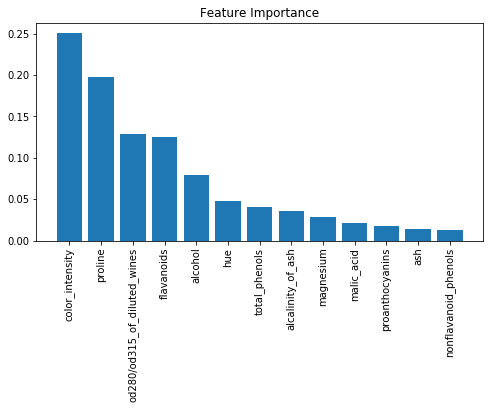

In [0]:
# 特徴量重要性を計算
importances = model.feature_importances_

# 特徴量重要性を降順にソート
indices = np.argsort(importances)[::-1]

# 特徴量の名前を、ソートした順に並び替え
names = [wine.feature_names[i] for i in indices]

plt.figure(figsize=(8,4)) #プロットのサイズ指定
plt.title("Feature Importance") # プロットのタイトルを作成
plt.bar(range(X.shape[1]), importances[indices]) # 棒グラフを追加
plt.xticks(range(X.shape[1]), names, rotation=90) # X軸に特徴量の名前を追加

plt.show() # プロットを表示